# Load dataset

In [1]:
import pandas as pd
import os 
from data_preprocessing import *

2023-02-13 06:54:36.799759: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
data_dir = 'data/experiment4/'

X_df = pd.read_csv(f'{data_dir}HA-ANARCI_X.csv')
y_df = pd.read_csv(f'{data_dir}HA-ANARCI_y.csv')['binding']

X_df, y_df = subsample_stemhead(X_df, y_df)

# display(x, y, y.value_counts())

In [ ]:
def to_tf_dataset(x, y, y_label='binding',convert_dict=None):
    x = pd.DataFrame(x)
    if convert_dict:
        x = x.replace(convert_dict)
    y = pd.Series(y).reset_index(drop=True)
    full = pd.concat([x, y],axis=1)
    full.columns = [*list(map(str,list(range(1, x.shape[1]+1)))), y_label]
    display(full.shape)
    return tfdf.keras.pd_dataframe_to_tf_dataset(full, label=y_label)


In [3]:

cdr_char = 'XEDRKHQNSTPGCAVILMFYW-'
test_size = 0.1

pad_len = []
for c in X_df[['VH_AA','VL_AA']]:
    pad_len.append(X_df[c].str.len().max())

codes_dict = {i: c for i, c in enumerate(cdr_char)}

[train_set, val_set, test_set], [X_train_id, X_eval_id, X_test_id], le = encode(X_df, y_df, cdr_char, test_size, pad_len)
[train_set_tf, val_set_tf, test_set_tf] = [to_tf_dataset(x, y, convert_dict=codes_dict) for (x,y) in [train_set, val_set, test_set]] ## debug


/home/yhyeung2/anaconda3/lib/python3.9/site-packages/tensorflow_decision_forests/keras/core.py:1001: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  (dict(dataframe.drop(label, 1)), dataframe[label].values))
2023-02-13 06:54:53.059161: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-02-13 06:54:53.086990: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:31:00.0 name: NVIDIA RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 715.34GiB/s
2023-02-13 06:54:53.087227: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4b:00.0 name: NVIDIA RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 715.34GiB/s

In [56]:
from tensorflow.keras.utils import to_categorical

(train_x, y_train), (val_x, y_val), (test_x, y_test) = [train_set, val_set, test_set]
y_train, y_val, y_test = to_categorical(y_train), to_categorical(y_val), to_categorical(y_test)
input_length = train_x.shape[1]

# Train

In [6]:
from tensorflow.keras import backend as K
from model_training import *


## deep learning models

### transformer model

In [49]:
K.clear_session()
CDR_model = CDR_model_single(max_length=input_length, n_classes=3)
CDR_model, CDR_history = train_dl(CDR_model, (train_x, y_train), (val_x, y_val))


Epoch 1/256
178/178 [==============================] - 12s 41ms/step - loss: 1.0971 - accuracy: 0.3766 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5338 - val_loss: 1.0991 - val_accuracy: 0.3544 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5063
Epoch 2/256
178/178 [==============================] - 6s 35ms/step - loss: 1.0915 - accuracy: 0.3879 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5555 - val_loss: 1.1057 - val_accuracy: 0.3544 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5063
Epoch 3/256
178/178 [==============================] - 6s 34ms/step - loss: 1.0914 - accuracy: 0.3865 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5458 - val_loss: 1.1066 - val_accuracy: 0.3544 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5063
Epoch 4/256
178/178 [==============================] - 6s 34ms/step - loss: 1.0893 - accuracy: 0.3865 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5562 - val_loss: 1.10

Epoch 31/256
178/178 [==============================] - 7s 37ms/step - loss: 1.0893 - accuracy: 0.3865 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5558 - val_loss: 1.1057 - val_accuracy: 0.3544 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5063
Epoch 32/256
178/178 [==============================] - 6s 34ms/step - loss: 1.0887 - accuracy: 0.3865 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5569 - val_loss: 1.1038 - val_accuracy: 0.3544 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5063
Epoch 33/256
178/178 [==============================] - 7s 37ms/step - loss: 1.0907 - accuracy: 0.3865 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5512 - val_loss: 1.1079 - val_accuracy: 0.3544 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5063


In [50]:
eval_df, pred, (label, pred_bool) = test_model_multi(CDR_model, (test_x, y_test, X_test_id), le)
display(eval_df)

(88, 3)


False    48
True     40
dtype: int64

,Id,Label,Prediction,Probability Stem,Probability Head,Probability Others
59,W85-1A08,others,head,0.315258,0.350118,0.334624
30,ADI-22769,others,head,0.315264,0.350127,0.334609
254,5.6.c2887,others,head,0.315242,0.350135,0.334623
153,PGT157,others,head,0.315260,0.350121,0.334619
228,ADI-15906,others,head,0.315259,0.350121,0.334620
79,F8_68_CI-7_LA_P9S3_9,others,head,0.315257,0.350127,0.334616
100,ADI-42809,others,head,0.315234,0.350146,0.334620
246,AG11-E05,others,head,0.315253,0.350129,0.334617
203,ADI-20976,others,head,0.315255,0.350120,0.334625
112,CV2-19,others,head,0.315266,0.350118,0.334616


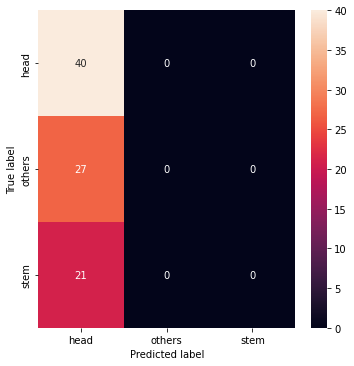

In [51]:
plot_cm_multi(label, pred_bool, le)

### feed forward network

In [52]:
# dense 

K.clear_session()
CDR_model = CDR_model_dense(max_length=input_length, n_classes=3)
CDR_model, CDR_history = train_dl(CDR_model, (train_x, y_train), (val_x, y_val))



Epoch 1/256
178/178 [==============================] - 3s 10ms/step - loss: 3.1792 - accuracy: 0.3526 - precision: 0.3540 - recall: 0.3385 - auc: 0.5223 - val_loss: 1.3269 - val_accuracy: 0.3797 - val_precision: 0.3913 - val_recall: 0.3418 - val_auc: 0.5744
Epoch 2/256
178/178 [==============================] - 1s 6ms/step - loss: 1.5096 - accuracy: 0.3484 - precision: 0.3646 - recall: 0.2906 - auc: 0.5227 - val_loss: 1.0491 - val_accuracy: 0.4177 - val_precision: 0.3778 - val_recall: 0.2152 - val_auc: 0.6414
Epoch 3/256
178/178 [==============================] - 1s 8ms/step - loss: 1.3354 - accuracy: 0.3808 - precision: 0.3961 - recall: 0.2849 - auc: 0.5585 - val_loss: 1.0160 - val_accuracy: 0.4430 - val_precision: 0.5455 - val_recall: 0.3797 - val_auc: 0.6761
Epoch 4/256
178/178 [==============================] - 1s 6ms/step - loss: 1.1511 - accuracy: 0.4260 - precision: 0.4514 - recall: 0.2948 - auc: 0.6108 - val_loss: 0.9980 - val_accuracy: 0.4051 - val_precision: 0.4444 - val_reca

Epoch 33/256
178/178 [==============================] - 1s 8ms/step - loss: 0.8542 - accuracy: 0.6037 - precision: 0.6754 - recall: 0.4725 - auc: 0.7923 - val_loss: 0.7844 - val_accuracy: 0.6582 - val_precision: 0.7551 - val_recall: 0.4684 - val_auc: 0.8164
Epoch 34/256
178/178 [==============================] - 1s 6ms/step - loss: 0.9285 - accuracy: 0.5501 - precision: 0.6357 - recall: 0.3963 - auc: 0.7486 - val_loss: 0.8233 - val_accuracy: 0.6835 - val_precision: 0.7857 - val_recall: 0.4177 - val_auc: 0.8199
Epoch 35/256
178/178 [==============================] - 1s 8ms/step - loss: 0.8498 - accuracy: 0.6107 - precision: 0.7304 - recall: 0.4471 - auc: 0.8010 - val_loss: 0.7619 - val_accuracy: 0.7089 - val_precision: 0.7705 - val_recall: 0.5949 - val_auc: 0.8481
Epoch 36/256
178/178 [==============================] - 1s 6ms/step - loss: 0.8071 - accuracy: 0.6065 - precision: 0.7131 - recall: 0.4767 - auc: 0.8100 - val_loss: 0.7477 - val_accuracy: 0.6962 - val_precision: 0.7183 - val_r

Epoch 65/256
178/178 [==============================] - 1s 6ms/step - loss: 0.6233 - accuracy: 0.6939 - precision: 0.7811 - recall: 0.6192 - auc: 0.8909 - val_loss: 0.7027 - val_accuracy: 0.7215 - val_precision: 0.8065 - val_recall: 0.6329 - val_auc: 0.8821
Epoch 66/256
178/178 [==============================] - 1s 8ms/step - loss: 0.5865 - accuracy: 0.7433 - precision: 0.8044 - recall: 0.6671 - auc: 0.9097 - val_loss: 0.8697 - val_accuracy: 0.6709 - val_precision: 0.7333 - val_recall: 0.5570 - val_auc: 0.8421
Epoch 67/256
178/178 [==============================] - 1s 6ms/step - loss: 0.6467 - accuracy: 0.7094 - precision: 0.7741 - recall: 0.6333 - auc: 0.8860 - val_loss: 0.9442 - val_accuracy: 0.5316 - val_precision: 0.6552 - val_recall: 0.4810 - val_auc: 0.7689
Epoch 68/256
178/178 [==============================] - 1s 8ms/step - loss: 0.6226 - accuracy: 0.7292 - precision: 0.8074 - recall: 0.6446 - auc: 0.8951 - val_loss: 0.8019 - val_accuracy: 0.5696 - val_precision: 0.7755 - val_r

In [53]:

eval_df, pred, (label, pred_bool) = test_model_multi(CDR_model, (test_x, y_test, X_test_id), le)
display(eval_df)

(88, 3)


True     51
False    37
dtype: int64

,Id,Label,Prediction,Probability Stem,Probability Head,Probability Others
772,2897,head,others,0.167093,0.242276,0.590631
810,R95-1H08,head,others,0.162992,0.305652,0.531356
803,R95-1D08,head,stem,0.361005,0.294160,0.344835
825,W85-3G03,head,others,0.191660,0.291534,0.516806
813,R95-2C02,head,stem,0.398985,0.337976,0.263039
705,150055-008_3F01,head,stem,0.671164,0.097744,0.231092
695,SFV018_2D01,head,stem,0.427464,0.250753,0.321783
711,150055-015_1B05,head,others,0.325145,0.258521,0.416334
537,007_11_4E01,head,others,0.194478,0.271639,0.533883
714,150055-015_1D02,head,others,0.327958,0.329778,0.342264


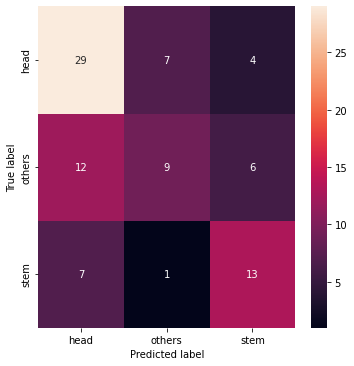

In [54]:
plot_cm_multi(label, pred_bool, le)

### random forest

In [39]:
# save model

# model_save_dir = 'models/20230119_multi_exp4/random_forest'
# if not os.path.exists(model_save_dir):
#     os.makedirs(model_save_dir)

# CDR_model.save(model_save_dir)



# load model

model_load_dir = 'models/20230119_multi_exp4/random_forest'
CDR_model_multi = tf.keras.models.load_model(model_load_dir, 
                                             custom_objects={
                                                 'recall_m': recall_m,
                                                 'precision_m': precision_m,
                                                 'f1_score': f1_score
                                             })
CDR_model = CDR_model_multi

[INFO kernel.cc:929] Loading model from path
[INFO decision_forest.cc:590] Model loaded with 300 root(s), 36230 node(s), and 208 input feature(s).
[INFO abstract_model.cc:876] Engine "RandomForestGeneric" built
[INFO kernel.cc:797] Use fast generic engine


In [162]:
# skip if use pre-trained model

# K.clear_session()
# CDR_model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)
# CDR_model, CDR_history = train_tree_multi(CDR_model, train_set_tf, val_set_tf)


[INFO kernel.cc:727] Start Yggdrasil model training
[INFO kernel.cc:728] Collect training examples
[INFO kernel.cc:389] Number of batches: 12
[INFO kernel.cc:390] Number of examples: 709
[INFO data_spec_inference.cc:286] 5 item(s) have been pruned (i.e. they are considered out of dictionary) for the column 1 (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO data_spec_inference.cc:286] 5 item(s) have been pruned (i.e. they are considered out of dictionary) for the column 10 (4 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO data_spec_inference.cc:286] 4 item(s) have been pruned (i.e. they are considered out of dictionary) for the column 101 (12 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO data_spec_inference.cc:286] 9 item(s) have been pruned (i.e. they are considered out of dictionary) for the column 104 (6 item(s) left) because min_value_count=5 and max_number_of_unique_values=

[INFO random_forest.cc:568] Training of tree  61/300 (tree index:60) done accuracy:0.637518 logloss:0.885328
[INFO random_forest.cc:568] Training of tree  71/300 (tree index:70) done accuracy:0.640338 logloss:0.879608
[INFO random_forest.cc:568] Training of tree  81/300 (tree index:79) done accuracy:0.634697 logloss:0.877492
[INFO random_forest.cc:568] Training of tree  91/300 (tree index:90) done accuracy:0.637518 logloss:0.828578
[INFO random_forest.cc:568] Training of tree  101/300 (tree index:100) done accuracy:0.643159 logloss:0.778848
[INFO random_forest.cc:568] Training of tree  111/300 (tree index:110) done accuracy:0.648801 logloss:0.778519
[INFO random_forest.cc:568] Training of tree  121/300 (tree index:120) done accuracy:0.653032 logloss:0.77565
[INFO random_forest.cc:568] Training of tree  131/300 (tree index:130) done accuracy:0.654443 logloss:0.774026
[INFO random_forest.cc:568] Training of tree  141/300 (tree index:140) done accuracy:0.654443 logloss:0.771617
[INFO rand

[INFO kernel.cc:929] Loading model from path
[INFO decision_forest.cc:590] Model loaded with 300 root(s), 36210 node(s), and 205 input feature(s).
[INFO abstract_model.cc:876] Engine "RandomForestGeneric" built
[INFO kernel.cc:797] Use fast generic engine


In [40]:
eval_df, pred, (label, pred_bool) = test_model_multi(CDR_model, (test_set_tf, y_test, X_test_id), le)
display(eval_df)

(88, 3)


True     82
False     6
dtype: int64

,Id,Label,Prediction,Probability Stem,Probability Head,Probability Others
813,R95-2C02,head,others,0.126667,0.396666,0.476666
707,150055-010_2E06,head,others,0.123333,0.370000,0.506666
248,Tgk5,others,head,0.290000,0.366666,0.343333
451,54.a.84_Heavy,stem,others,0.386666,0.073333,0.540000
394,220-14-IgG_1A05,stem,others,0.296666,0.340000,0.363333
341,030_09_1E05,stem,others,0.340000,0.300000,0.360000


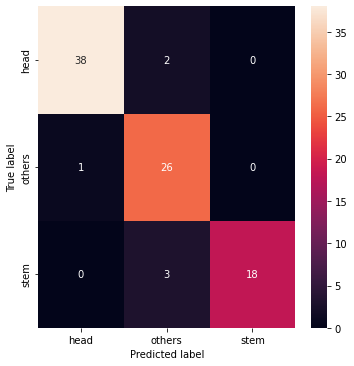

In [41]:
plot_cm_multi(label, pred_bool, le)

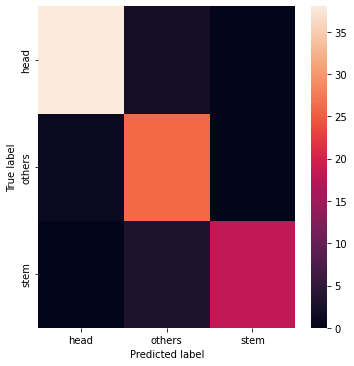

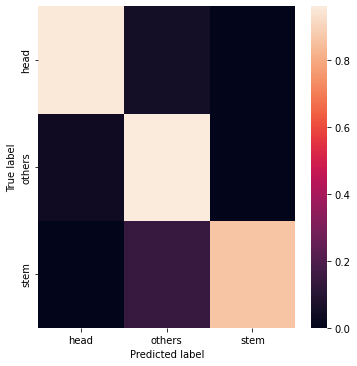

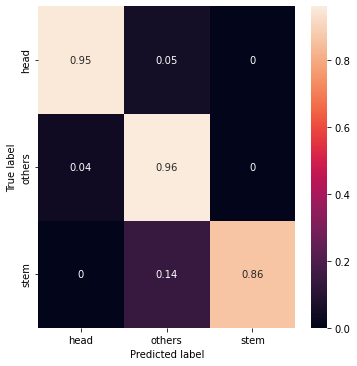

In [47]:
plot_cm_multi(label, pred_bool, le, annot=False)
plot_cm_multi(label, pred_bool, le, relative=True, annot=False)
plot_cm_multi(label, pred_bool, le, relative=True)

# Visualize

## extract decision tree rules

In [42]:
from viz_tree import *

In [43]:
# following tfdf library's default
num_trees = 300
max_depth = 16

rule_df = extract_tree(CDR_model, num_trees, max_depth)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [03:28<00:00,  1.44it/s]


## plot

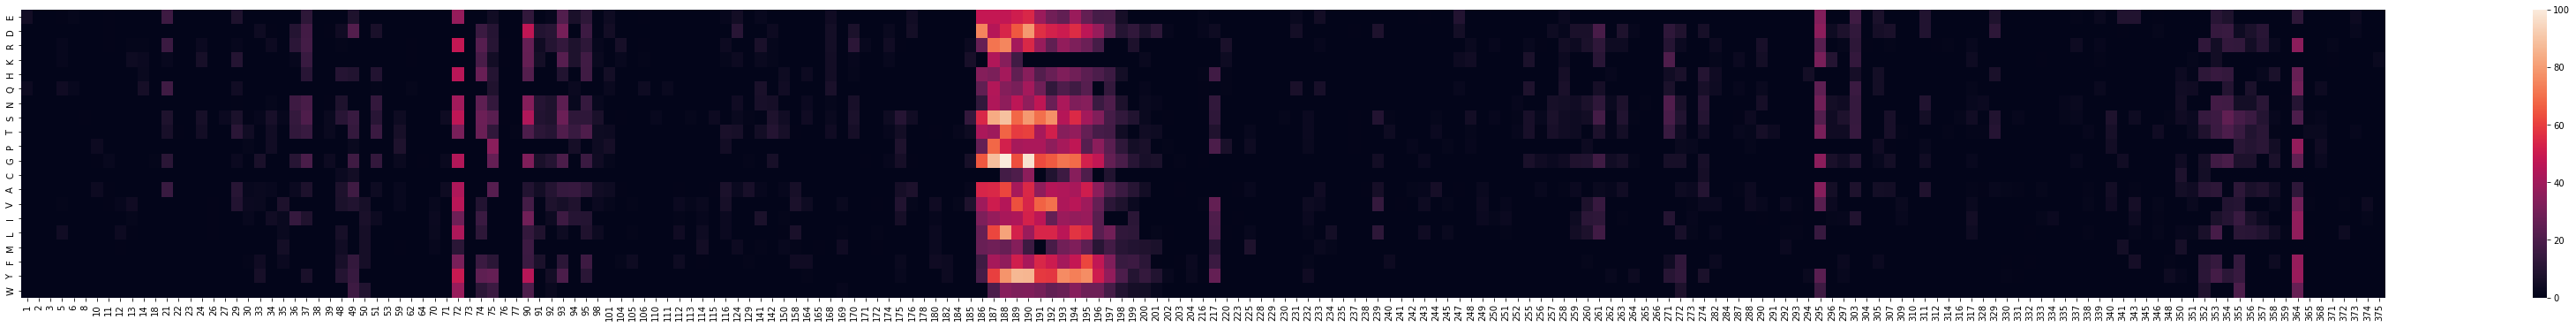

In [44]:

draw_heatmap(rule_df)

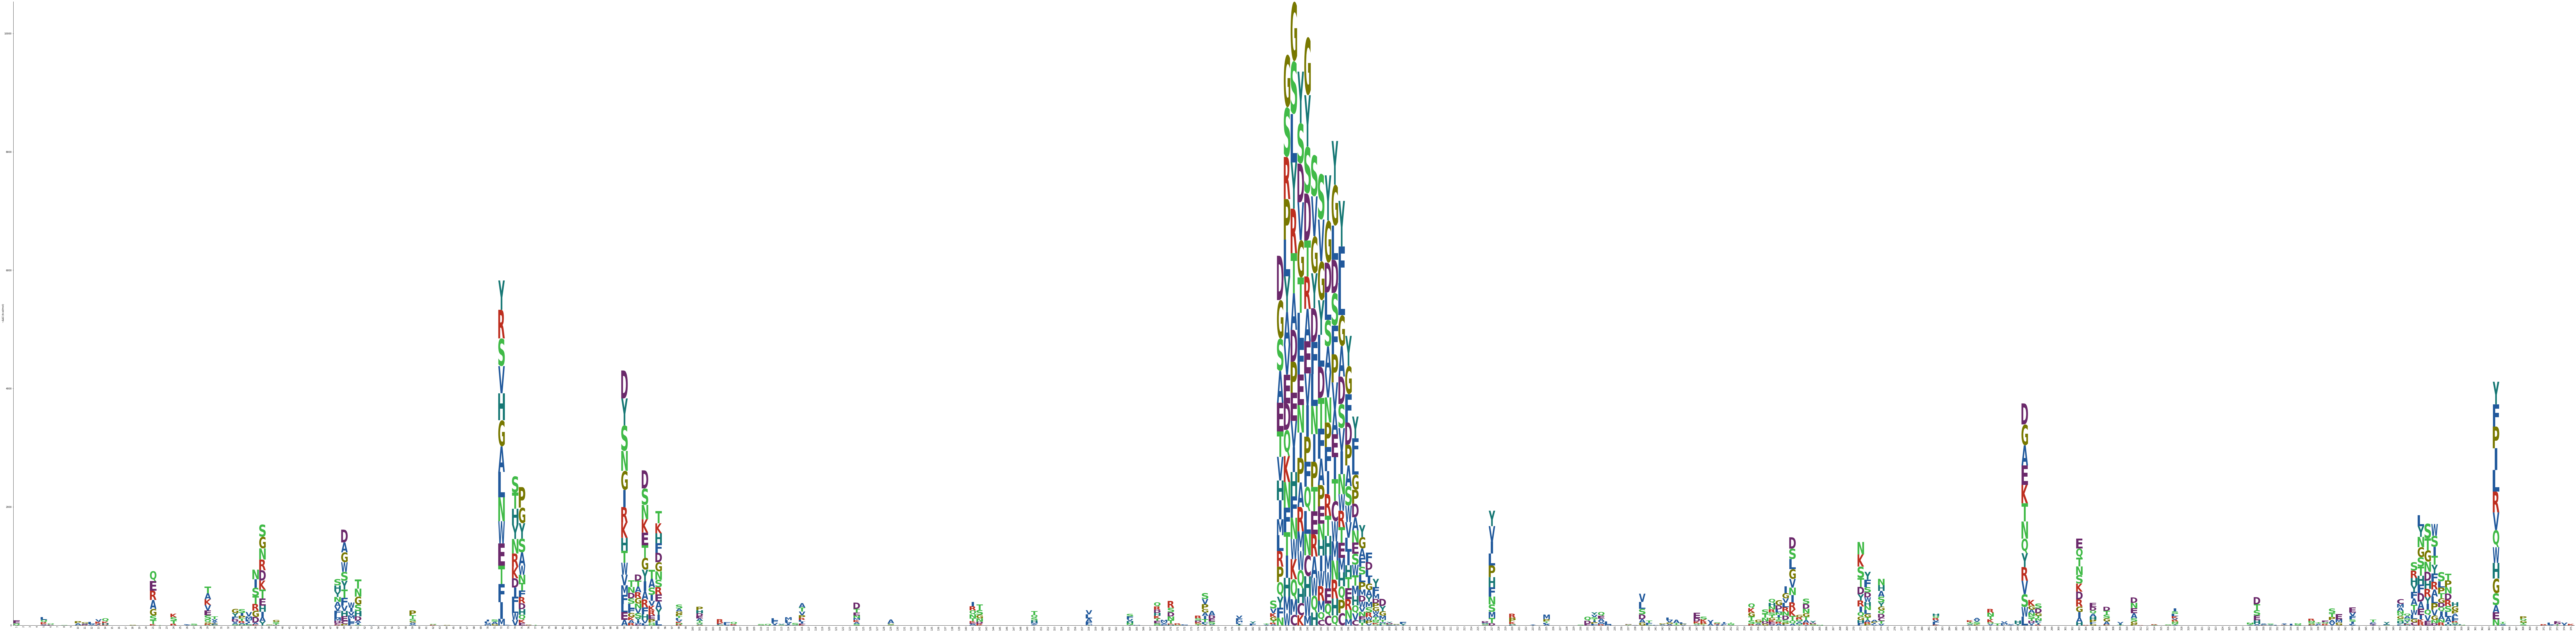

In [45]:
logosequence(rule_df)